<a href="https://colab.research.google.com/github/LiamJHowarth/IA-Sentinel/blob/main/Canonical_Data_Model_Micro_Py!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Micro-Py - Canonical Data Model

How can you minimise the impacts of multiple different data formas when we begin to integrate between applications?

### Why seeking a data model is important?
Well, especially in the case of outsourcing software - applications were not designed to specifically speak with other bespoke applications. Therefore, this is common data format issue when working on integration projects. With the exponenial growth in applications or services, often enterprise transformation can work in siloes to achieve segmented integration success, but it often lacks the broader context and interoperability required.



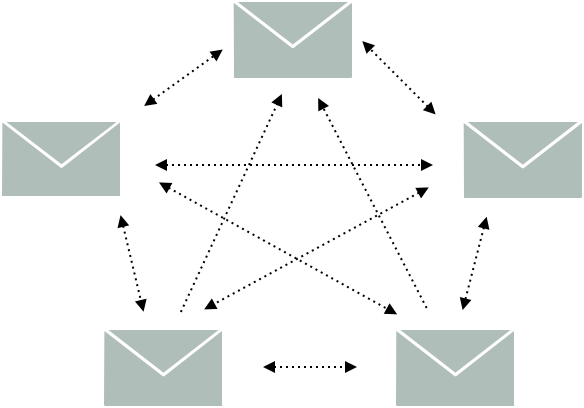



### Scalability Concerns
Solving common data formats in siloed transformation projects becomes unfeasible to implement due to scalability and maintainability of translators. When the scale of applications and/or microservices grow to 6 or more units, given they all send data to each other to fulfill business objectives, we would require 30 or more message translators with out a Canonical Data Model. Therefore is there another way to create a scalable solution for this problem?

Yes. We can use a Canonical Data Model. Adopting the below could reduce dependicies of 30 message translators down to just 12.  





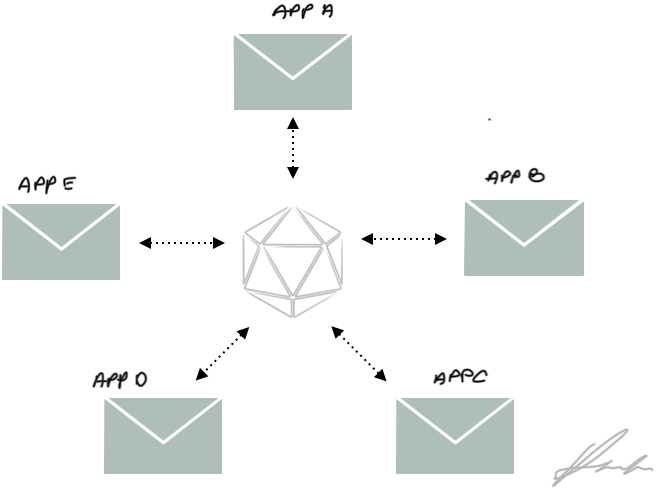

## Canonical Data Model with Python

A Canonical Data Model (CDM) is a design pattern used to reduce the complexity of integrating multiple applications. Instead of having each application know how to communicate with every other application's specific data format, all applications translate their data to and from a single, standardized "canonical" format.

Let's imagine we have three hypothetical applications, each with a different way of representing 'User' data. Our goal is to convert all these different formats into a single, unified canonical representation.

### 1. Hypothetical Application Data Formats

Here are three different ways our applications might represent user information:

In [ ]:
import json

# Application 1: CRM System (JSON-like dictionary)
crm_user_data = {
    "customer_id": "C001",
    "first_name": "Alice",
    "last_name": "Smith",
    "email_address": "alice.smith@example.com",
    "status": "active",
    "registration_date": "2023-01-15"
}

# Application 2: E-commerce Platform (Tuple-based)
ecommerce_user_data = (
    "alice_s",
    "Alice Smith",
    "alice.smith@example.com",
    True, # Is active
    "2023-01-15 10:30:00"
)

# Application 3: HR System (List of dictionaries with different keys)
hr_user_data = [
    {"employee_id": "EMP001", "full_name": "Alice Smith", "contact_email": "alice.smith@example.com", "is_active": "Y", "created_at": "1673779200"}, # Unix timestamp
    {"employee_id": "EMP002", "full_name": "Bob Johnson", "contact_email": "bob.j@example.com", "is_active": "N", "created_at": "1673779200"}
]

print("CRM Data:", json.dumps(crm_user_data, indent=2))
print("\nE-commerce Data:", ecommerce_user_data)
print("\nHR Data:", json.dumps(hr_user_data, indent=2))

CRM Data: {
  "customer_id": "C001",
  "first_name": "Alice",
  "last_name": "Smith",
  "email_address": "alice.smith@example.com",
  "status": "active",
  "registration_date": "2023-01-15"
}

E-commerce Data: ('alice_s', 'Alice Smith', 'alice.smith@example.com', True, '2023-01-15 10:30:00')

HR Data: [
  {
    "employee_id": "EMP001",
    "full_name": "Alice Smith",
    "contact_email": "alice.smith@example.com",
    "is_active": "Y",
    "created_at": "1673779200"
  },
  {
    "employee_id": "EMP002",
    "full_name": "Bob Johnson",
    "contact_email": "bob.j@example.com",
    "is_active": "N",
    "created_at": "1673779200"
  }
]


### 2. Define the Canonical Data Model

We'll define a standardised dictionary format that can accommodate all necessary information from our different sources. This model aims to be comprehensive but also normalized to avoid redundancy and inconsistencies.

In [ ]:
from datetime import datetime

def create_canonical_user(user_id, full_name, email, is_active, created_at):
    """
    Creates a standardized user dictionary based on the Canonical Data Model.
    """
    return {
        "user_id": str(user_id), # Ensure ID is always a string
        "full_name": str(full_name),
        "email": str(email),
        "is_active": bool(is_active), # Standardize to boolean
        "created_at": created_at.isoformat() if isinstance(created_at, datetime) else str(created_at) # Standardize date format
    }

# Example of an empty canonical user (for reference)
canonical_user_template = {
    "user_id": None,
    "full_name": None,
    "email": None,
    "is_active": None,
    "created_at": None # ISO 8601 format preferred
}

print("Canonical User Template:", json.dumps(canonical_user_template, indent=2))

Canonical User Template: {
  "user_id": null,
  "full_name": null,
  "email": null,
  "is_active": null,
  "created_at": null
}


### 3. Implement Converters to the Canonical Model

Now, we'll write functions to convert data from each application's format into our `create_canonical_user` function's expected arguments.

In [ ]:
def convert_crm_to_canonical(crm_data):
    return create_canonical_user(
        user_id=crm_data["customer_id"],
        full_name=f"{crm_data['first_name']} {crm_data['last_name']}",
        email=crm_data["email_address"],
        is_active=(crm_data["status"] == "active"),
        created_at=datetime.fromisoformat(crm_data["registration_date"])
    )

def convert_ecommerce_to_canonical(ecommerce_data):
    username, full_name, email, is_active, created_at_str = ecommerce_data
    return create_canonical_user(
        user_id=username, # Using username as ID for this app
        full_name=full_name,
        email=email,
        is_active=is_active,
        created_at=datetime.strptime(created_at_str, "%Y-%m-%d %H:%M:%S")
    )

def convert_hr_to_canonical(hr_data_entry):
    # hr_data_entry is one dictionary from the list
    return create_canonical_user(
        user_id=hr_data_entry["employee_id"],
        full_name=hr_data_entry["full_name"],
        email=hr_data_entry["contact_email"],
        is_active=(hr_data_entry["is_active"] == "Y"),
        created_at=datetime.fromtimestamp(int(hr_data_entry["created_at"]))
    )

### 4. Demonstrate Conversions

Now let's see our data transformed into the canonical format.

In [ ]:
# Convert CRM data
canonical_crm_user = convert_crm_to_canonical(crm_user_data)
print("Canonical CRM User:", json.dumps(canonical_crm_user, indent=2))

# Convert E-commerce data
canonical_ecommerce_user = convert_ecommerce_to_canonical(ecommerce_user_data)
print("\nCanonical E-commerce User:", json.dumps(canonical_ecommerce_user, indent=2))

# Convert HR data (each entry separately)
canonical_hr_users = [convert_hr_to_canonical(entry) for entry in hr_user_data]
print("\nCanonical HR Users:", json.dumps(canonical_hr_users, indent=2))

Canonical CRM User: {
  "user_id": "C001",
  "full_name": "Alice Smith",
  "email": "alice.smith@example.com",
  "is_active": true,
  "created_at": "2023-01-15T00:00:00"
}

Canonical E-commerce User: {
  "user_id": "alice_s",
  "full_name": "Alice Smith",
  "email": "alice.smith@example.com",
  "is_active": true,
  "created_at": "2023-01-15T10:30:00"
}

Canonical HR Users: [
  {
    "user_id": "EMP001",
    "full_name": "Alice Smith",
    "email": "alice.smith@example.com",
    "is_active": true,
    "created_at": "2023-01-15T10:40:00"
  },
  {
    "user_id": "EMP002",
    "full_name": "Bob Johnson",
    "email": "bob.j@example.com",
    "is_active": false,
    "created_at": "2023-01-15T10:40:00"
  }
]


### When to use?
This model is also known as a double translation, therefore use it only in the context of the requirement. For example, if latency and throughput is critical, then a double translation may not be efficient enough. But for most cases, the benefits of using such a model can transform the way cross-functional terms work together and refer to data within the specified domain. For enteprise that commonly have a large noumber of disparate applications, a canonical data model can reduce ambiguity and dissonance between systems.

### Conclusion

As you can see, all three different input formats are now consistently represented in our `canonical_user` dictionary structure. This allows any consuming application to only understand one data format, significantly simplifying integration efforts and improving maintainability.